# Dropsondes
Dropsondes were launched from Polar 5 providing profiles of air temperature, humidity, pressure, and the horizontal wind vector between flight altitude (3-4 km) and the surface. The full dataset is available on PANGAEA for [ACLOUD](https://doi.pangaea.de/10.1594/PANGAEA.900204), [AFLUX](https://doi.pangaea.de/10.1594/PANGAEA.921996), and [MOSAiC-ACA](https://doi.pangaea.de/10.1594/PANGAEA.933581). Each NetCDF file contains dropsondes of a single flight ordered into groups.

## Data access
* To analyse the data they first have to be loaded by importing the (AC)³airborne meta data catalogue. To do so the ac3airborne package has to be installed. More information on how to do that and about the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

# local caching
kwds = {'simplecache': dict(
    cache_storage=os.environ['INTAKE_CACHE'], 
    same_names=True
)}

## Get data

In [2]:
import ac3airborne

List of flights, where dropsondes are available:

In [3]:
cat = ac3airborne.get_intake_catalog()

datasets = []
for campaign in ['ACLOUD', 'AFLUX','MOSAiC-ACA','HALO-AC3','COMPEX-EC']:
    datasets.extend(list(cat[campaign]['P5']['DROPSONDES']))

datasets.extend(list(cat['HAMAG']['P6']['DROPSONDES']))
datasets

['ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF13',
 'ACLOUD_P5_RF14',
 'ACLOUD_P5_RF16',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'AFLUX_P5_RF02',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF15',
 'MOSAiC-ACA_P5_RF05',
 'MOSAiC-ACA_P5_RF06',
 'MOSAiC-ACA_P5_RF07',
 'MOSAiC-ACA_P5_RF08',
 'MOSAiC-ACA_P5_RF09',
 'MOSAiC-ACA_P5_RF10',
 'MOSAiC-ACA_P5_RF11',
 'HALO-AC3_P5_RF01',
 'HALO-AC3_P5_RF02',
 'HALO-AC3_P5_RF03',
 'HALO-AC3_P5_RF04',
 'HALO-AC3_P5_RF05',
 'HALO-AC3_P5_RF07',
 'HALO-AC3_P5_RF08',
 'HALO-AC3_P5_RF09',
 'HALO-AC3_P5_RF10',
 'HALO-AC3_P5_RF11',
 'HALO-AC3_P5_RF12',
 'HALO-AC3_P5_RF13',
 'COMPEX-EC_P5_RF01',
 'COMPEX-EC_P5_RF03',
 'COMPEX-EC_P5_RF05',
 'COMPEX-EC_P5_RF06',
 'COMPEX-EC_P5_RF07',
 'HAMAG_P6_RF01',
 'HAMAG_P6_R

## Dataset
To get an overview of the variables recorded by the dropsondes, we load the first dropsonde released during `ACLOUD_P5_RF05`.

In [4]:
ds_dsd = cat['ACLOUD']['P5']['DROPSONDES']['ACLOUD_P5_RF05'](i_sonde=1).to_dask()
ds_dsd

/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 25kB
Dimensions:     (z: 529)
Dimensions without coordinates: z
Data variables:
    GPS_Alt     (z) float32 2kB ...
    Baro_Alt    (z) float32 2kB ...
    Time        (z) float32 2kB ...
    Lat         (z) float32 2kB ...
    Lon         (z) float32 2kB ...
    Pressure    (z) float32 2kB ...
    Temp        (z) float32 2kB ...
    Temp_recon  (z) float32 2kB ...
    RHum        (z) float32 2kB ...
    RHum_recon  (z) float32 2kB ...
    Wind_vel    (z) float32 2kB ...
    Wind_dir    (z) float32 2kB ...
Attributes:
    Dropsonde_number_of_flight:  1
    Launch_Time_UTC:             09:09:10
    Sonde_ID:                    162715269/RS904

### View variables
Below are vertical profiles of temperature, relative humidity, wind velocity and wind direction of that dropsonde shown.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use("../../mplstyle/book")

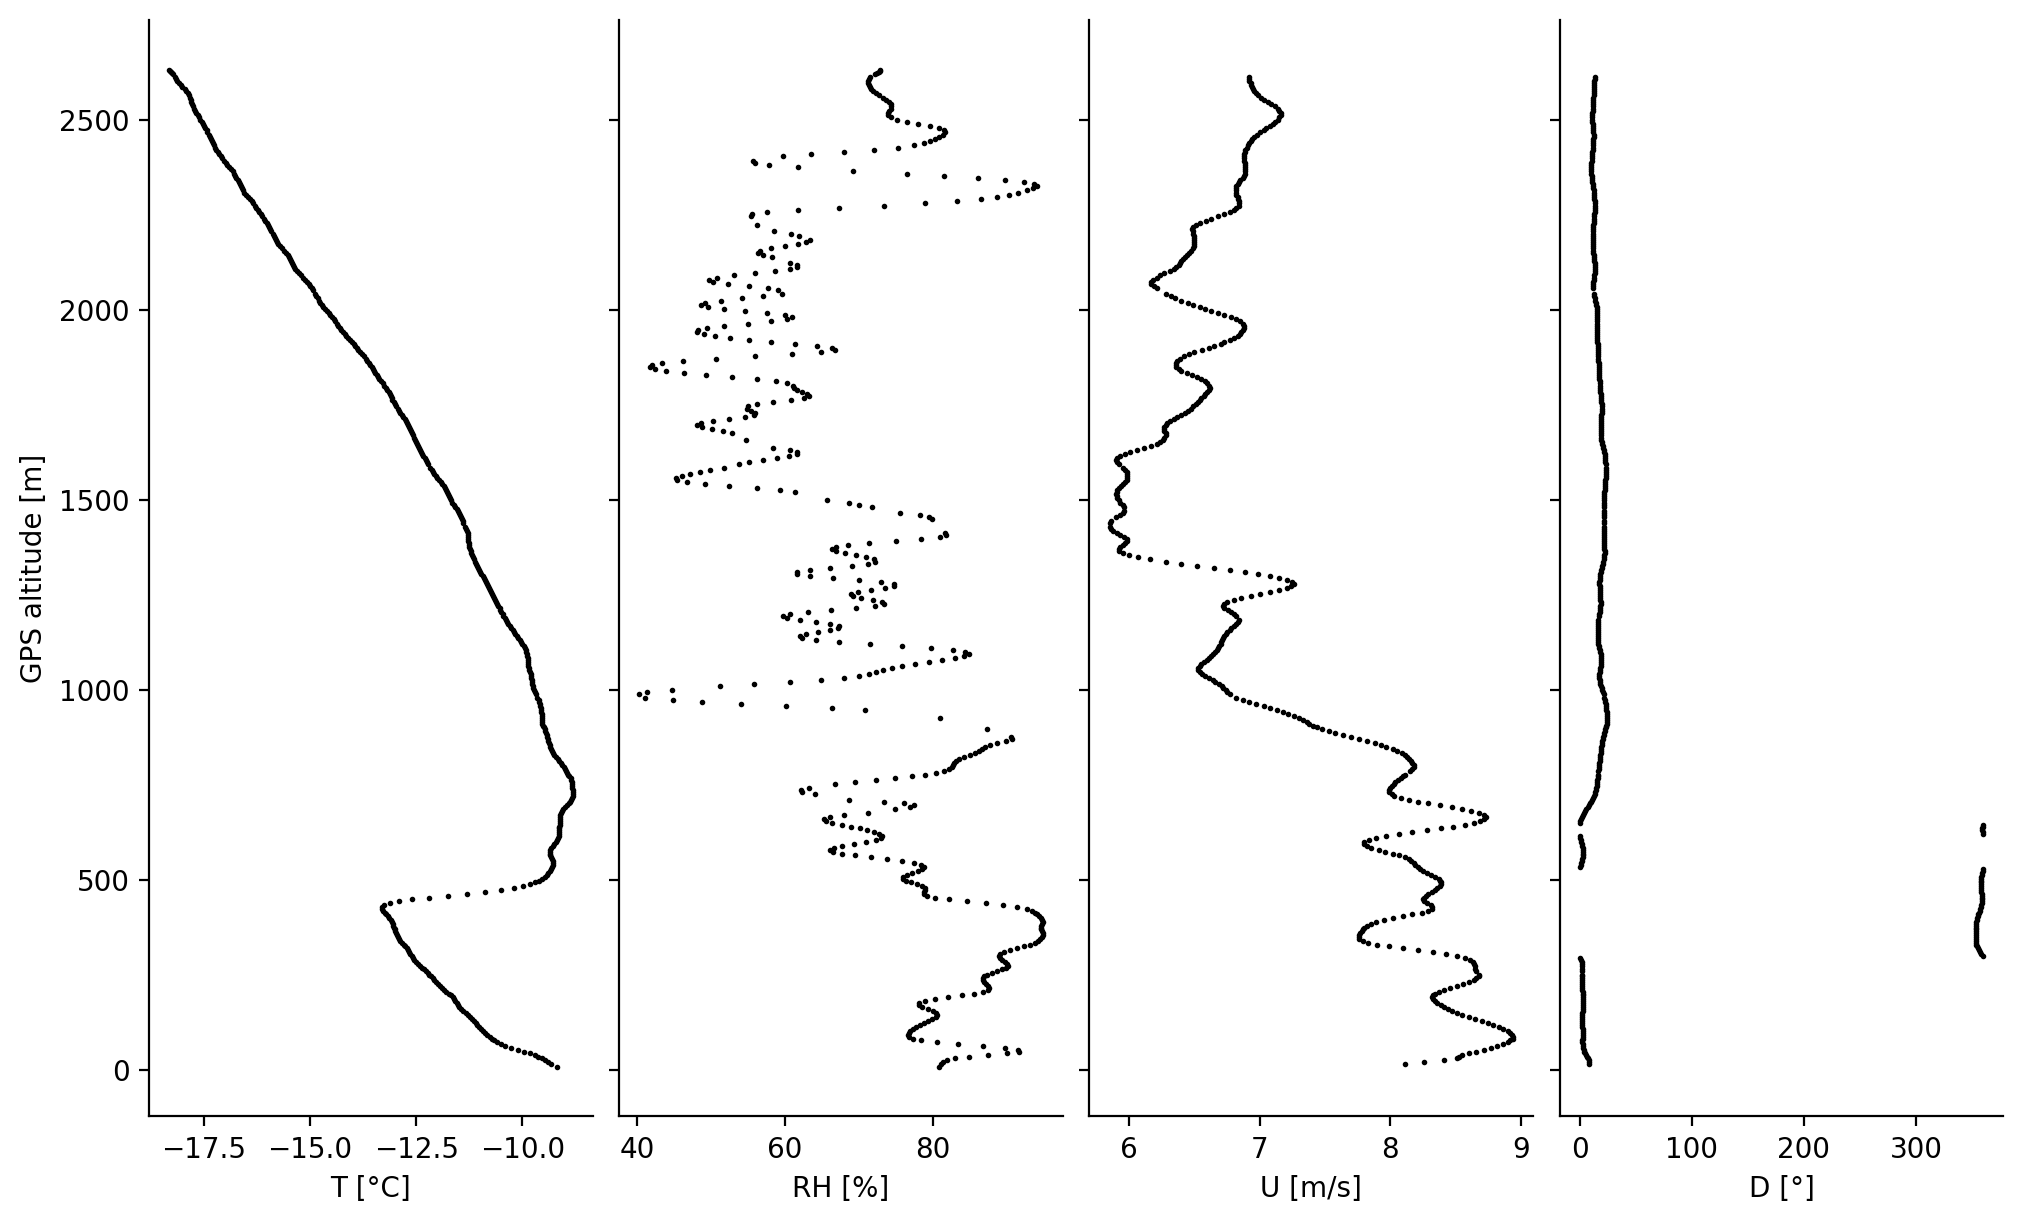

In [6]:
fig, ax = plt.subplots(1, 4, sharey=True)

var_names = ['Temp_recon', 'RHum_recon', 'Wind_vel', 'Wind_dir']
labels = ['T [°C]', 'RH [%]', 'U [m/s]', 'D [°]']

kwargs = dict(s=1, color='k')
for i, var_name in enumerate(var_names):
    
    ax[i].scatter(ds_dsd[var_name], ds_dsd.GPS_Alt, **kwargs)
    
    ax[i].set_xlabel(labels[i])

ax[0].set_ylabel('GPS altitude [m]')
    
plt.show()

## Load Polar 5 flight phase information
Polar 5 flights are divided into segments to easily access start and end times of flight patterns. For more information have a look at the respective [github](https://github.com/igmk/flight-phase-separation) repository.

At first we want to load the flight segments of (AC)³airborne

In [7]:
meta = ac3airborne.get_flight_segments() 

Create a list with all dropsondes during the campaigns:

In [ ]:
ds_dict = {'ACLOUD': {}, 'AFLUX': {}, 'MOSAiC-ACA': {},'HALO-AC3': {},'HAMAG': {},'COMPEX-EC': {}}
for campaign in meta.values():
    for platform in campaign.values():
        for flight in platform.values():
            for segment in flight['segments']:
                if 'dropsondes' in segment.keys() and segment['dropsondes']:
                    for sonde in segment['dropsondes']:
                        params = {'segment_id': segment['segment_id'],
                                  'flight_id': flight['flight_id'],
                                  'date': flight['date'],
                                  'name': flight['name'],
                                 }
                        ds_dict[flight['mission']][sonde] = params
                        print(sonde)

{'ACLOUD_P5_RF04': {'co-location': [], 'contacts': [{'email': 'christof.luepkes@awi.de', 'name': 'Christof Luepkes', 'tags': ['pi']}, {'email': 'n.risse@uni-koeln.de', 'name': 'Nils Risse', 'tags': ['lc']}], 'date': datetime.date(2017, 5, 23), 'events': ['Noseboom calibration', 'Ny-Alesund overflight'], 'flight_id': 'ACLOUD_P5_RF04', 'flight_report': 'https://home.uni-leipzig.de/~ehrlich/ACLOUD_wiki_doku/lib/exe/fetch.php?media=04_20170523_p5_acloud_flight_report.pdf', 'landing': datetime.datetime(2017, 5, 23, 14, 23, 40), 'mission': 'ACLOUD', 'name': 'RF04', 'platform': 'P5', 'remarks': ['Clouds above open water and sea ice', 'EAGLE/HAWK showed some problems due to a broken cable', 'SMART connection was sometimes interrupted', 'Dropsonde system was not working'], 'segments': [{'dropsondes': [], 'end': datetime.datetime(2017, 5, 23, 9, 22, 49), 'irregularities': [], 'kinds': ['major_ascent'], 'levels': [100, 9300], 'name': 'major ascent', 'segment_id': 'ACLOUD_P5_RF04_ma', 'start': dat

Get total number of dropsondes during the campaigns:

In [11]:
for mission, sondes in ds_dict.items():
    n = len(sondes.values())
    print('{n} dropsondes are available from {mission}.'.format(
        n=n, mission=mission))

55 dropsondes are available from ACLOUD.
33 dropsondes are available from AFLUX.
60 dropsondes are available from MOSAiC-ACA.
47 dropsondes are available from HALO-AC3.
0 dropsondes are available from HAMAG.
28 dropsondes are available from COMPEX-EC.


In [13]:
for it in ds_dict['ACLOUD'].items():
    print(it)

('ACLOUD_P5_RF05_DS01', {'segment_id': 'ACLOUD_P5_RF05_hl02', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS02', {'segment_id': 'ACLOUD_P5_RF05_hl02', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS03', {'segment_id': 'ACLOUD_P5_RF05_hl03', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS04', {'segment_id': 'ACLOUD_P5_RF05_hl05', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS05', {'segment_id': 'ACLOUD_P5_RF05_hl07', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS06', {'segment_id': 'ACLOUD_P5_RF05_hl09', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS07', {'segment_id': 'ACLOUD_P5_RF05_hl10', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 

In [14]:
for sonde_id, params in ds_dict['ACLOUD'].items():
    print(sonde_id[-2:])

01
02
03
04
05
06
07
01
02
03
01
02
03
01
02
01
02
03
01
02
03
01
02
03
04
05
06
01
01
02
03
01
02
03
04
05
06
07
01
02
03
04
05
01
02
03
04
01
02
01
02
03
04
01
02


/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.

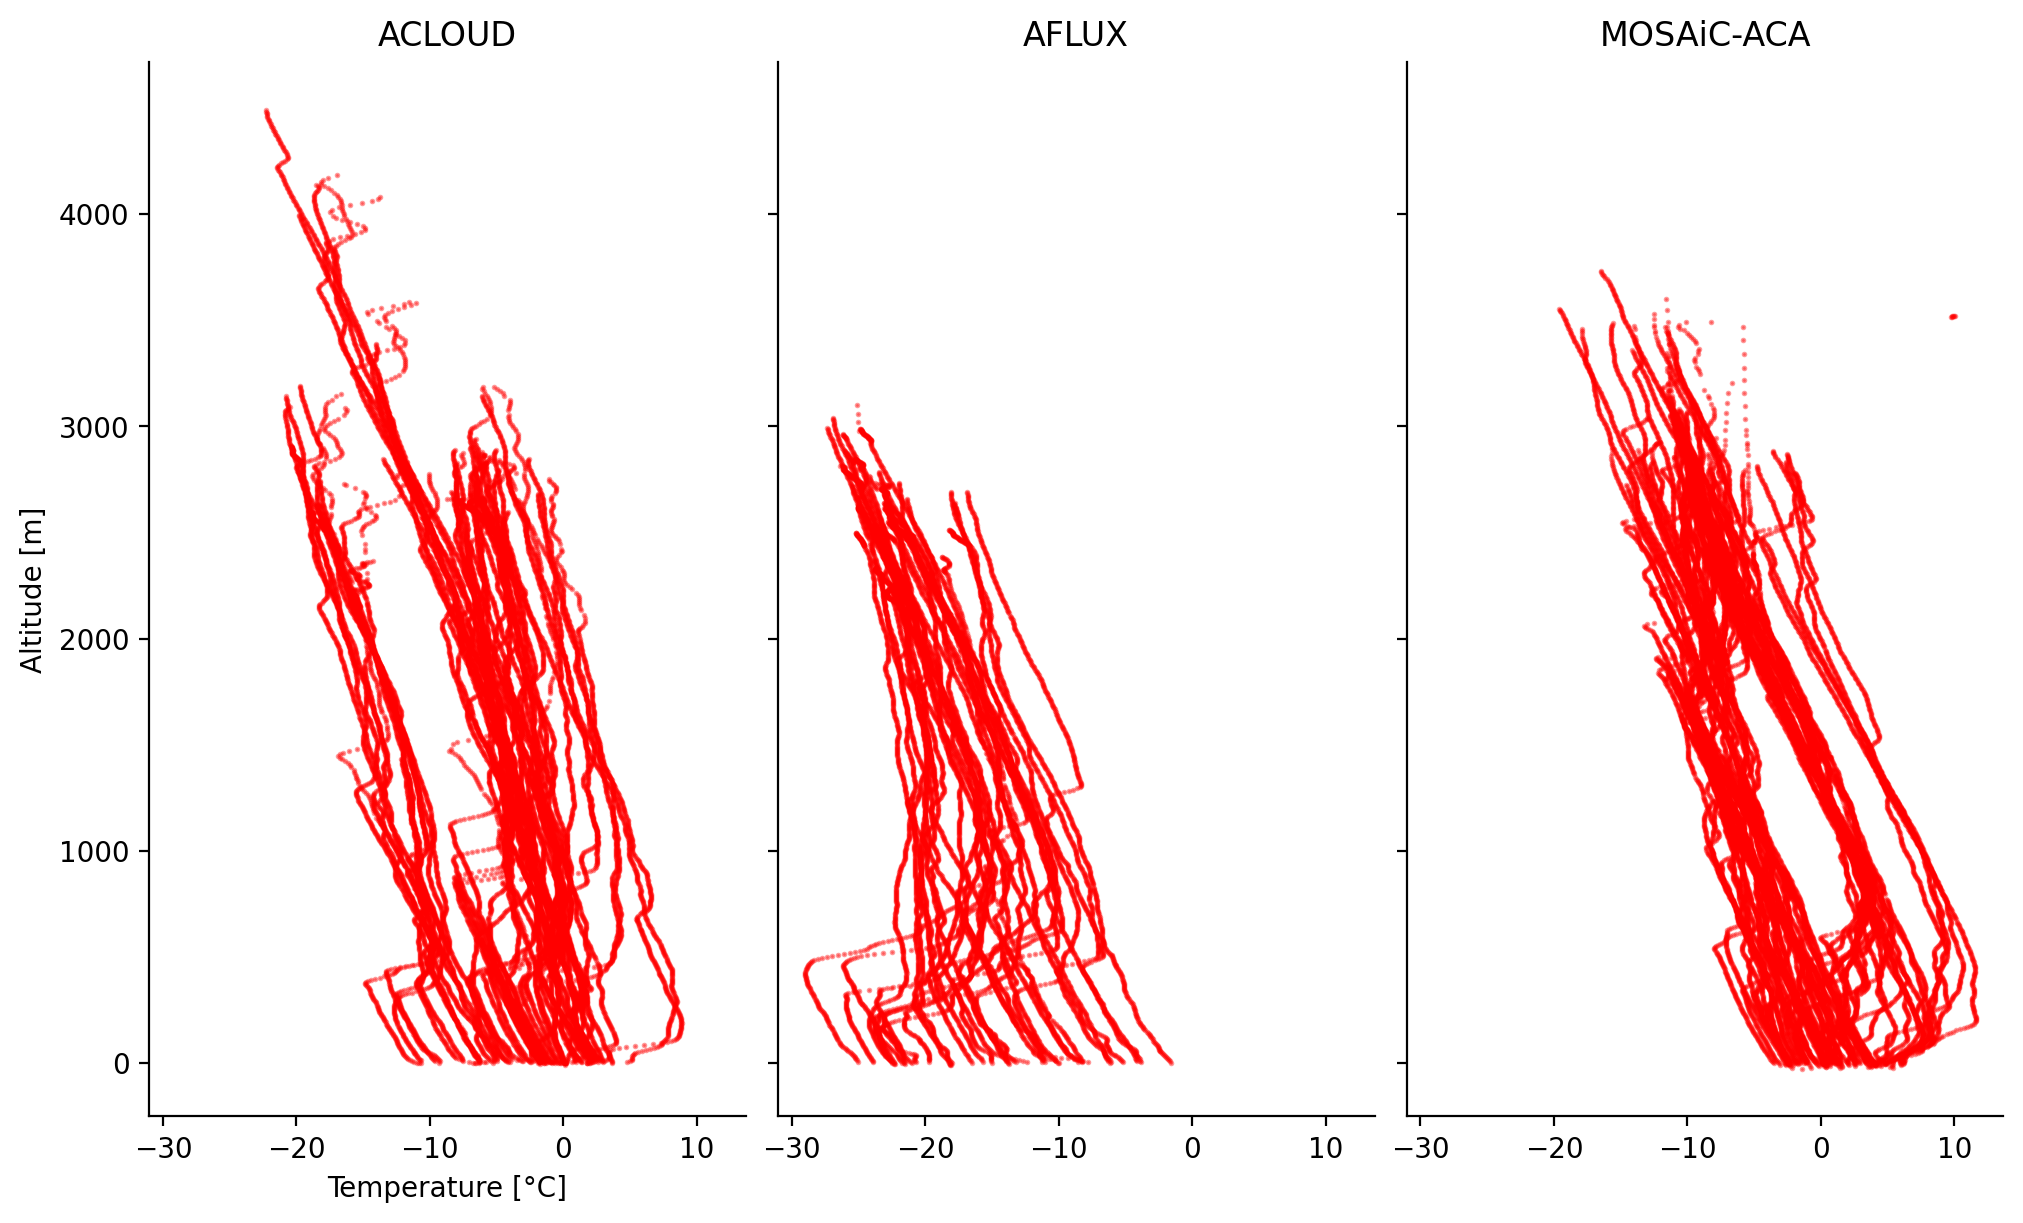

In [22]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)

ax = {'ACLOUD': axes[0], 'AFLUX': axes[1], 'MOSAiC-ACA': axes[2]}

kwargs = dict(s=1, color='red', alpha=0.4)
for mission, sondes in ds_dict.items():
    
    if mission not in ['HALO-AC3','HAMAG','COMPEX-EC']:
        ax[mission].set_title(mission)

        for sonde_id, params in ds_dict[mission].items():

            # read dropsonde data
            i_sonde = int(sonde_id[-2:])
            ds = cat[mission]['P5']['DROPSONDES'][params['flight_id']](i_sonde=i_sonde).to_dask()

            ax[mission].scatter(ds.Temp_recon, ds.GPS_Alt, **kwargs)

axes[0].set_ylabel('Altitude [m]')
axes[0].set_xlabel('Temperature [°C]')
   
plt.show()

### Humidity profile

/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.

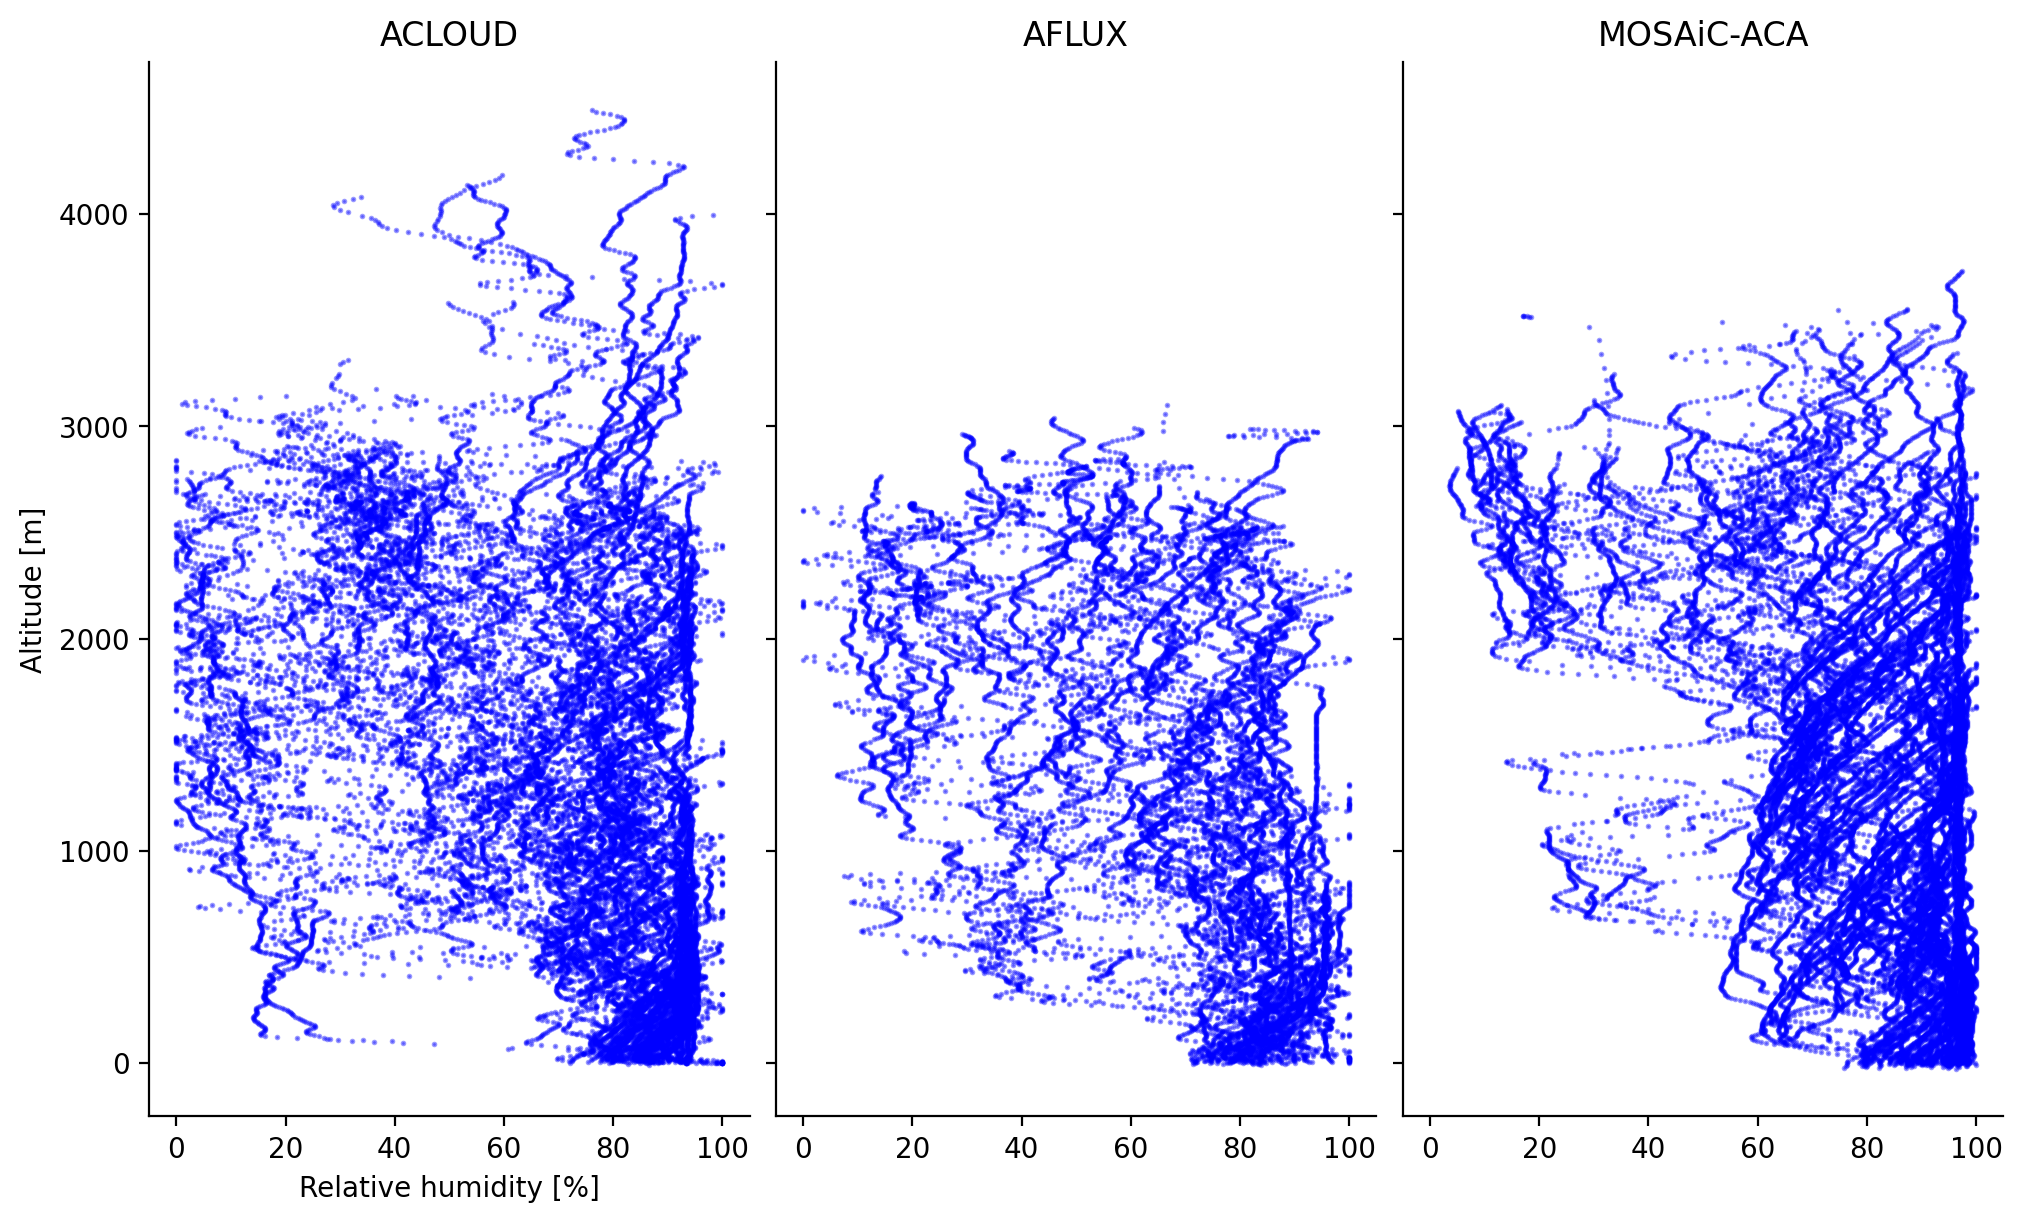

In [23]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)

ax = {'ACLOUD': axes[0], 'AFLUX': axes[1], 'MOSAiC-ACA': axes[2]}

kwargs = dict(s=1, color='blue', alpha=0.4)
for mission, sondes in ds_dict.items():

    if mission not in ['HALO-AC3','HAMAG','COMPEX-EC']:
        ax[mission].set_title(mission)

        for sonde_id, params in ds_dict[mission].items():

            # read dropsonde data
            i_sonde = int(sonde_id[-2:])
            ds = cat[mission]['P5']['DROPSONDES'][params['flight_id']](i_sonde=i_sonde).to_dask()

            ax[mission].scatter(ds.RHum_recon, ds.GPS_Alt, **kwargs)

axes[0].set_ylabel('Altitude [m]')
axes[0].set_xlabel('Relative humidity [%]')

plt.show()

### Wind profile

/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.

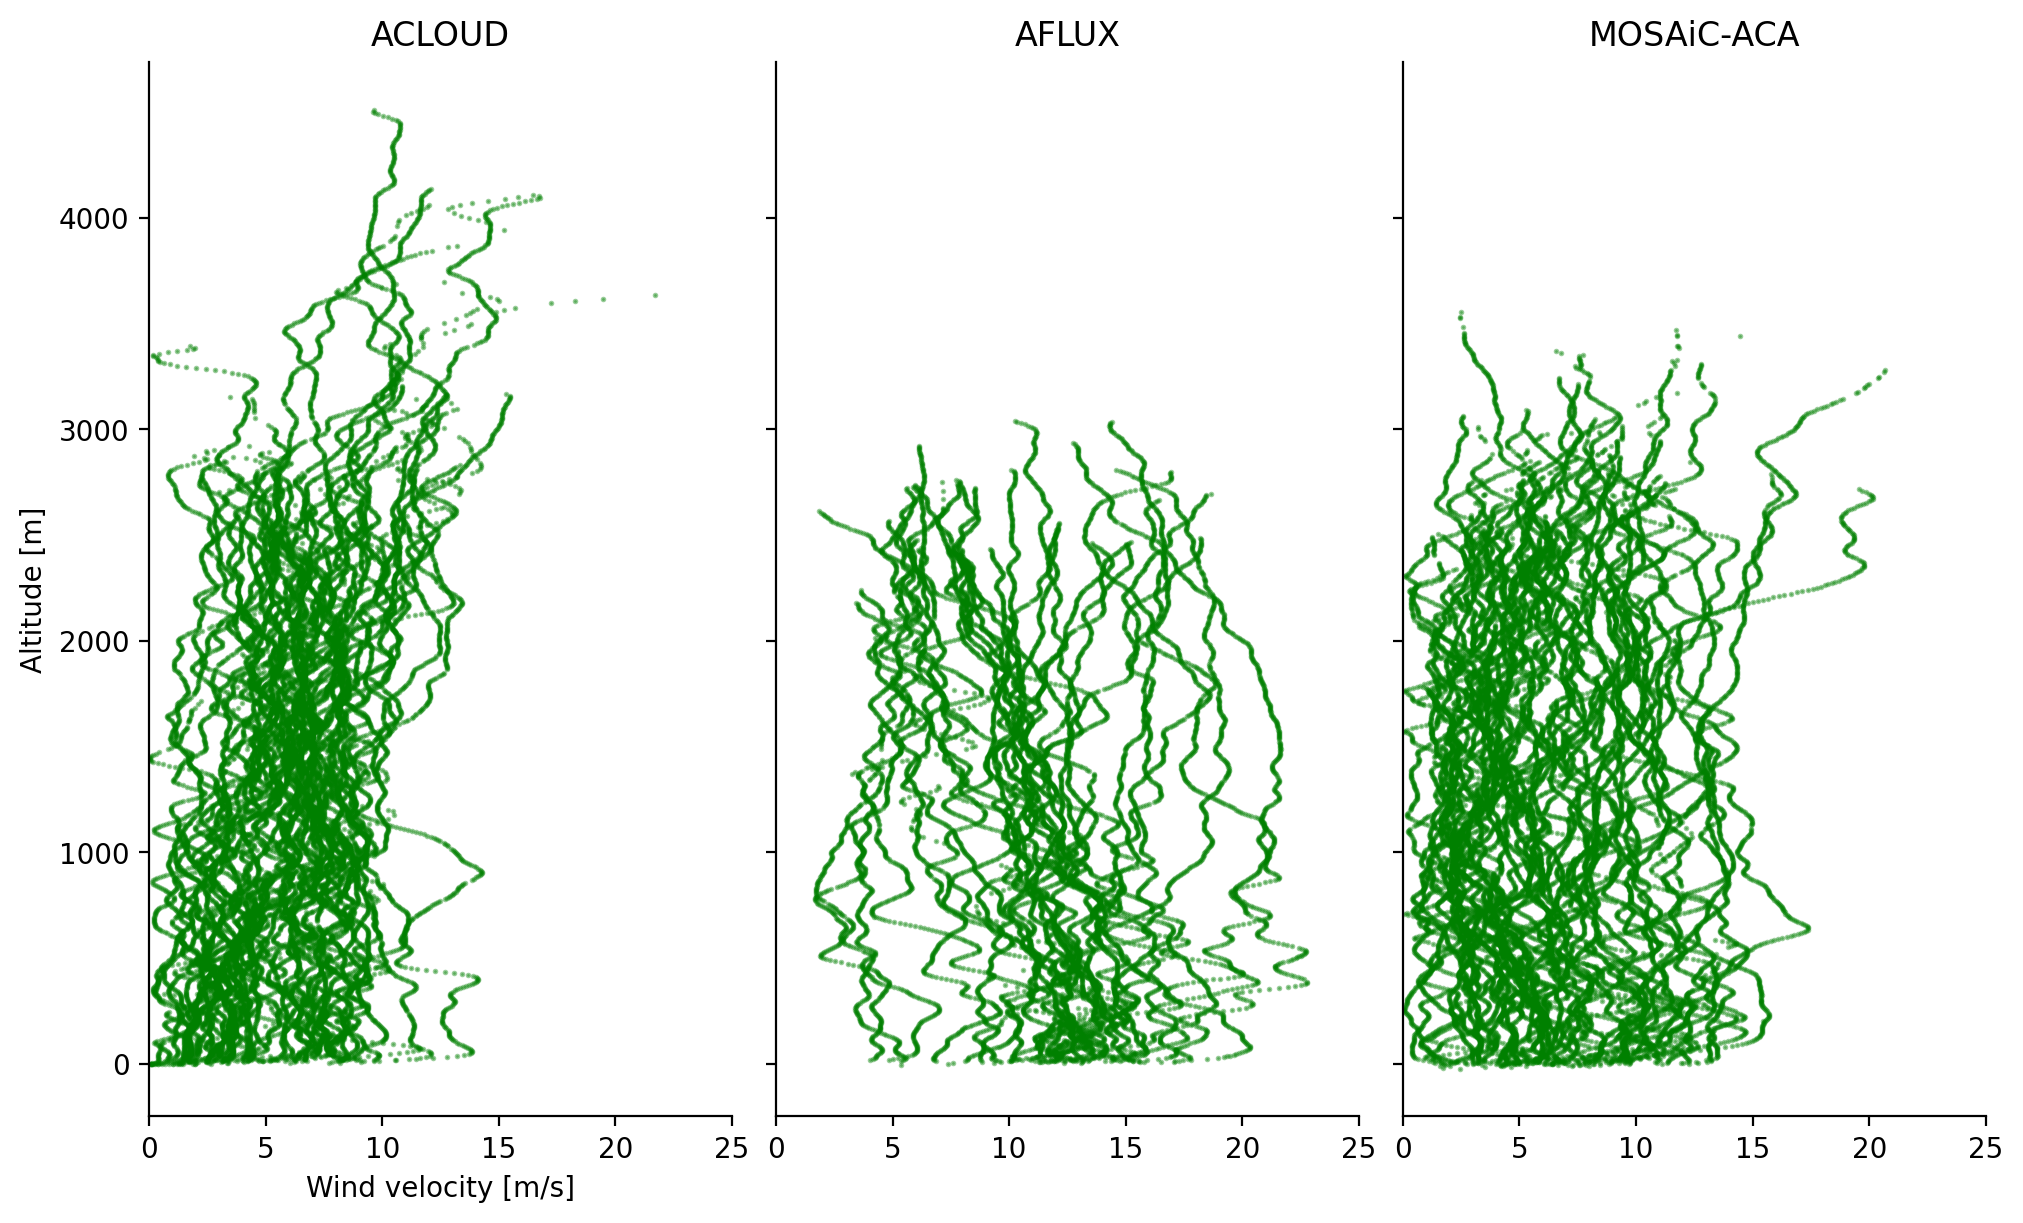

In [24]:
fig, axes = plt.subplots(1, 3, sharey=True)

ax = {'ACLOUD': axes[0], 'AFLUX': axes[1], 'MOSAiC-ACA': axes[2]}

kwargs = dict(s=1, color='green', alpha=0.4)
for mission, sondes in ds_dict.items():

    if mission not in ['HALO-AC3','HAMAG','COMPEX-EC']:
        ax[mission].set_title(mission)
        ax[mission].set_xlim(0, 25)

        for sonde_id, params in ds_dict[mission].items():

            # read dropsonde data
            i_sonde = int(sonde_id[-2:])
            ds = cat[mission]['P5']['DROPSONDES'][params['flight_id']](i_sonde=i_sonde).to_dask()

            ax[mission].scatter(ds.Wind_vel, ds.GPS_Alt, **kwargs)

axes[0].set_ylabel('Altitude [m]')
axes[0].set_xlabel('Wind velocity [m/s]')

plt.show()